## 1. Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
 fashion_train_df = pd.read_csv(r'D:\U T\_WithVideos_Machine Learning Practical 6 Real-World Applications\Udemy - Machine Learning Practical 6 Real-World Applications\3. Fashion Class Classification\P39-Fashion-MNIST-Datasets\fashion-mnist_train.csv', sep =',')

In [3]:
fashion_test_df = pd.read_csv(r'D:\U T\_WithVideos_Machine Learning Practical 6 Real-World Applications\Udemy - Machine Learning Practical 6 Real-World Applications\3. Fashion Class Classification\P39-Fashion-MNIST-Datasets\fashion-mnist_test.csv',sep=',')

In [4]:
fashion_train_df.head() ## each image is a  row of the pixel 785 values 28*28 = 784

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.tail()  ## see we hae 60,000 samples

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.shape

(60000, 785)

In [7]:
fashion_test_df.shape ## 10,000 samples are foir testing - we had 70,000 samples of data overall

(10000, 785)

## 2. Data Visualization

In [8]:
## we have datapoints as numbers, let's use numpy to handle such long arrays of numbers while training and testing arrays

training = np.array(fashion_train_df,dtype = 'float32')

In [9]:
testing = np.array(fashion_test_df, dtype='float32')

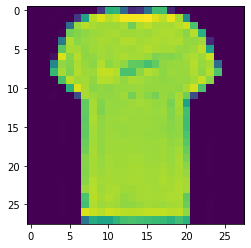

In [10]:
## lets just visualize just one image which is in 28*28 pixels
plt.imshow(training[10,1:].reshape(28,28)) 
## we need to reshape the data in form 28&28 
## we are beginning with 1: coz 0 is label and not the data reqd to build the img

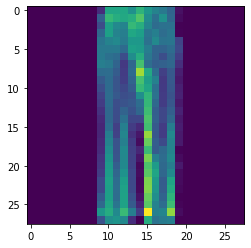

In [11]:
## instead of us specifiying the dataset number, we can use random
import random
i = random.randint(1,60000)
plt.imshow(training[i,1:].reshape(28,28))

In [12]:
## we need to display the label, so that the data makes more sense
label = training[i][0]
label

1.0

foref-------<br/>The 10 classes are as follows:
0 => T-shirt/top 1 => Trouser 2 => Pullover 3 => Dress 4 => Coat 5 => Sandal 6 => Shirt 7 => Sneaker 8 => Bag 9 => Ankle boot

1.0

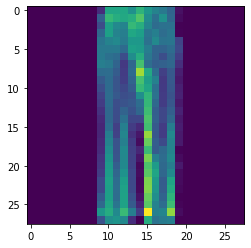

In [13]:
## near eh, lets put this info label aloing wtih the label
plt.imshow(training[i,1:].reshape(28,28))
label = training[i][0]
label  ##viola

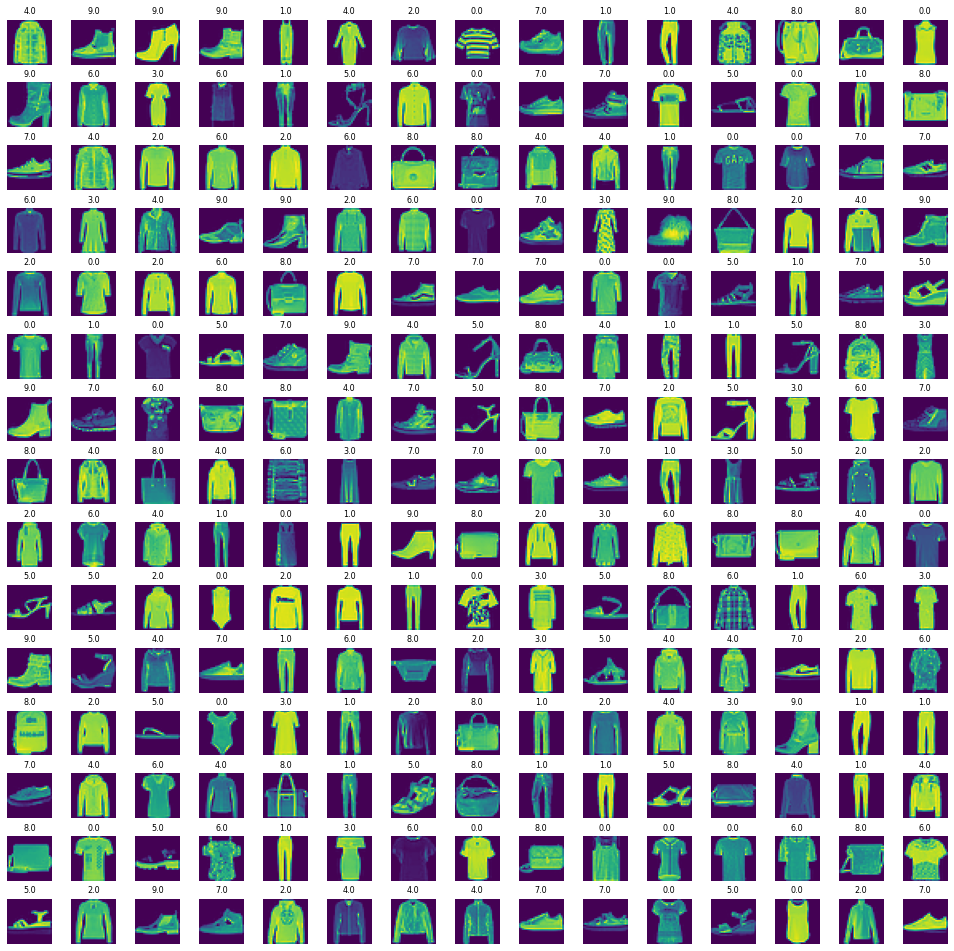

In [14]:
## create a matrix of images so that we can view more images on a grid 
W_grid = 15 # length of grid
L_grid =15  # widfth of grid

fig,axes = plt.subplots(L_grid, W_grid, figsize=(17,17))
axes = axes.ravel() ## flatten 15*15 into 225 array

for i in np.arange(0,W_grid*L_grid):  ##evenly spaced variables
    index = np.random.randint(0,len(training))

    axes[i].imshow(training[index,1:].reshape(28,28))
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)


## 3. Model Training

Convolution Neural Network :<br/><br/>
image --> Convolution -> Convolution layer(Kernels/Feature detectors) --> Pooling -> Pooling Layer(downsampling) --> Flattening --> input to NN --> Output

<br/><br/> 1 .kernels /feature detectors give feature maps
<br/><br/> 2. RELU activation function - rectified linear units (after the feature detection and before the pooling) -- used to add non-linearity in the feature map so that features pop up
<br/><br/> 3.Pooling - 4x4 image and boil it down to 2x2 while preserving the same features. there's avg,mni and max pooling. 
we use max pooling - we select sub matrices in a 4x4 and select the max of the sub matrix. to create a result 2x2 matirx.
<br/>
Max pooling also helps the model to generalise(like identify a tilted bag and straight bag as just bag)
<br/><br/>4. Falttening : now 2x2 is flattened to single 1d array and given as input to CNN

In [15]:
X_train = training[:,1:]/255 ## all wors and cols from1 snice 0 is label | div by 225 to normalise
y_train = training[:,0] ## label

In [16]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

we need to dev a valdtion dataset, which we can use it during training to help generalise and prvent overfitting - actually validate every once in a while training.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)


In [18]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1)) ## reshape all samples to 28x28
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [19]:
X_train.shape ## 48000 samples of 28x28 graysclae imgs

(48000, 28, 28, 1)

In [20]:
X_test.shape ## 10000 samples of 28x28 graysclae imgs

(10000, 28, 28, 1)

In [21]:
## training  
import keras

Using TensorFlow backend.


In [22]:
from keras.models import Sequential ## since we are buidling CNN sequentially starting form convulution layer ...
from keras.layers import Conv2D,MaxPooling2D, Dense, Flatten,Dropout 
from keras.optimizers import Adam 
from keras.callbacks import TensorBoard 


In [23]:
cnn_model = Sequential() 

In [24]:
## add convolution layer First
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))  ## input kernal 32 kernels of size 3x3



ipykernel_launcher:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`


In [25]:
cnn_model.add(MaxPooling2D(pool_size= (2,2))) ## maxpoolling layer 2x2

In [26]:
cnn_model.add(Flatten())  ## flatten layer

In [27]:
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid')) ## for output choosing 1 out of 10 output classes

ipykernel_launcher:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`


In [28]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics = ['accuracy'])

In [29]:
epochs=50  ## times we will presenting the trainging dataset and updating the weights

In [30]:
cnn_model.fit(X_train, y_train, batch_size=512, nb_epoch=epochs, verbose =1, validation_data=(X_validate,y_validate))##verbose = how much info you need while trainng the data

ipykernel_launcher:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 104us/step - loss: 0.8709 - accuracy: 0.7347 - val_loss: 0.5271 - val_accuracy: 0.8129
Epoch 2/50
48000/48000 [==============================] - 2s 50us/step - loss: 0.4819 - accuracy: 0.8338 - val_loss: 0.4399 - val_accuracy: 0.8444
Epoch 3/50
48000/48000 [==============================] - 2s 51us/step - loss: 0.4255 - accuracy: 0.8525 - val_loss: 0.4061 - val_accuracy: 0.8575
Epoch 4/50
48000/48000 [==============================] - 2s 52us/step - loss: 0.3936 - accuracy: 0.8647 - val_loss: 0.3834 - val_accuracy: 0.8680
Epoch 5/50
48000/48000 [==============================] - 3s 52us/step - loss: 0.3730 - accuracy: 0.8716 - val_loss: 0.3650 - val_accuracy: 0.8758
Epoch 6/50
48000/48000 [==============================] - 2s 51us/step - loss: 0.3570 - accuracy: 0.8770 - val_loss: 0.

In [31]:
help(Sequential().fit)

Help on method fit in module keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False, **kwargs) method of keras.engine.sequential.Sequential instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    # Arguments
        x: Input data. It could be:
            - A Numpy array (or array-like), or a list of arrays
              (in case the model has multiple inputs).
            - A dict mapping input names to the corresponding
              array/tensors, if the model has named inputs.
            - A generator or `keras.utils.Sequence` returning
              `(inputs, targets)` or `(inputs, targets, sample weights)`.
            - None (default) if feeding from framework-native


## 4.Evaluate the model

In [32]:
evaluation = cnn_model.evaluate(X_test,y_test)
print("Test Accuracy : {:.3f}".format(evaluation[1]))

ERROR! Session/line number was not unique in database. History logging moved to new session 76
10000/10000 [==============================] - 1s 109us/step
Test Accuracy : 0.909


In [34]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

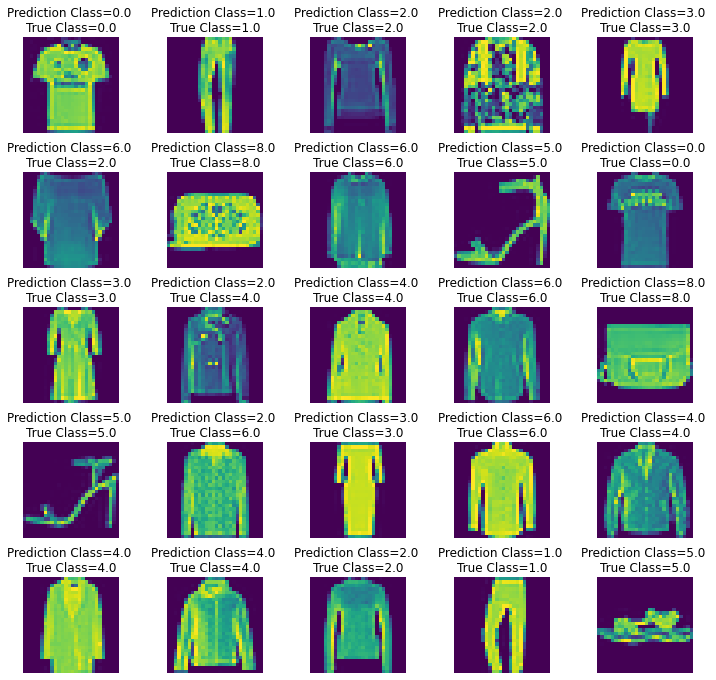

In [41]:
L=5
W=5 ## 5x5 grid

fig,axes = plt.subplots(L, W, figsize=(12,12))
axes = axes.ravel() ## flatten the axes array

for i in np.arange(0, L*W): ## 0 to 25
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class={:.1f} \nTrue Class={:.1f}".format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=.5)

<AxesSubplot:>

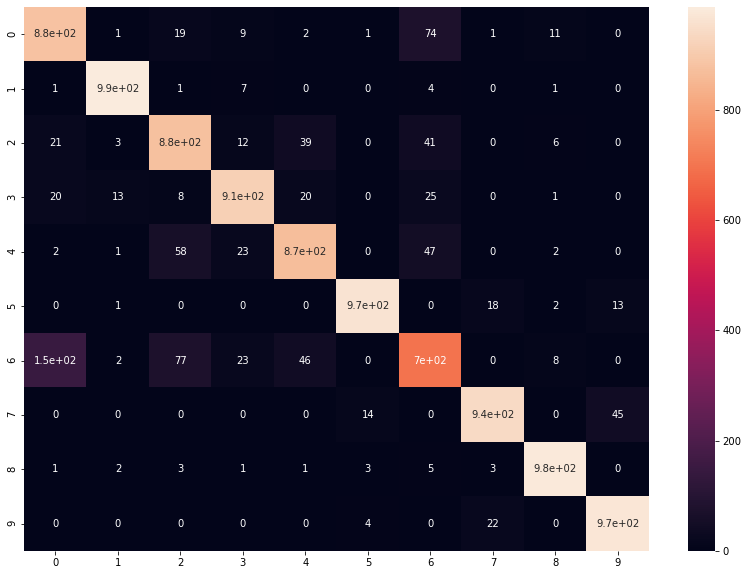

In [42]:
## confusion matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True)

In [43]:
## plot report 
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)] ## all classes

print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.82      0.88      0.85      1000
     Class 1       0.98      0.99      0.98      1000
     Class 2       0.84      0.88      0.86      1000
     Class 3       0.92      0.91      0.92      1000
     Class 4       0.89      0.87      0.88      1000
     Class 5       0.98      0.97      0.97      1000
     Class 6       0.78      0.70      0.74      1000
     Class 7       0.96      0.94      0.95      1000
     Class 8       0.97      0.98      0.98      1000
     Class 9       0.94      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

